<a name='1'></a>
## 1 - Packages

As usual, begin by loading in the packages.

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl  #Import as tfl for easier function calls
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


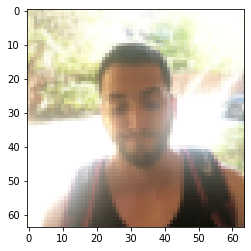

In [4]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

<a name='3'></a>
## 3 - The Sequential API

In the previous assignment, you built helper functions using `numpy` to understand the mechanics behind convolutional neural networks. Most practical applications of deep learning today are built using programming frameworks, which have many built-in functions you can simply call. Keras is a high-level abstraction built on top of TensorFlow, which allows for even more simplified and optimized model creation and training. 

For the first part of this assignment, you'll create a model using TF Keras' Sequential API, which allows you to build layer by layer, and is ideal for building models where each layer has **exactly one** input tensor and **one** output tensor. 

As you'll see, using the Sequential API is simple and straightforward, but is only appropriate for simpler, more straightforward tasks. Later in this notebook you'll spend some time building with a more flexible, powerful alternative: the Functional API. 
 

In [5]:
# GRADED FUNCTION: happyModel
# Is a sequential model
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=(3,3),input_shape=(64,64,3)), # Don't forget the Comma
            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(filters=32,kernel_size=(7,7)),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D with default parameters
            tfl.MaxPooling2D(),
            ## Flatten layer
            tfl.Flatten(), #All layers have to be title case
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1,activation="sigmoid")
        ])
    
    return model

In [6]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [7]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])  #Take that model, compile it and use the optimizers etc of your choice

It's time to check your model's parameters with the `.summary()` method. This will display the types of layers you have, the shape of the outputs, and how many parameters are in each layer. 

In [8]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [9]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 95ms/step - loss: 0.9515 - accuracy: 0.7550
Epoch 2/10
38/38 [==============================] - 3s 89ms/step - loss: 0.2347 - accuracy: 0.9067
Epoch 3/10
38/38 [==============================] - 3s 89ms/step - loss: 0.1870 - accuracy: 0.9267
Epoch 4/10
38/38 [==============================] - 3s 87ms/step - loss: 0.1242 - accuracy: 0.9500
Epoch 5/10
38/38 [==============================] - 3s 89ms/step - loss: 0.1034 - accuracy: 0.9650
Epoch 6/10
38/38 [==============================] - 3s 87ms/step - loss: 0.0633 - accuracy: 0.9800
Epoch 7/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0602 - accuracy: 0.9800
Epoch 8/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0565 - accuracy: 0.9800
Epoch 9/10
38/38 [==============================] - 3s 87ms/step - loss: 0.0439 - accuracy: 0.9883
Epoch 10/10
38/38 [==============================] - 3s 87ms/step - loss: 0.1152 - accuracy: 0.9633


In [10]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 34ms/step - loss: 2.1846 - accuracy: 0.5800


[2.1846201419830322, 0.5799999833106995]

Easy, right? But what if you need to build a model with shared layers, branches, or multiple inputs and outputs? This is where Sequential, with its beautifully simple yet limited functionality, won't be able to help you. 

Next up: Enter the Functional API, your slightly more complex, highly flexible friend.  

<a name='4'></a>
## 4 - The Functional API

Welcome to the second half of the assignment, where you'll use Keras' flexible [Functional API](https://www.tensorflow.org/guide/keras/functional) to build a ConvNet that can differentiate between 6 sign language digits. 

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one. 

In the visual example below, the one possible direction of the movement Sequential model is shown in contrast to a skip connection, which is just one of the many ways a Functional model can be constructed. A skip connection, as you might have guessed, skips some layer in the network and feeds the output to a later layer in the network. Don't worry, you'll be spending more time with skip connections very soon! 

In [12]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

<img src="images/SIGNS.png" style="width:800px;height:300px;">

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = 4


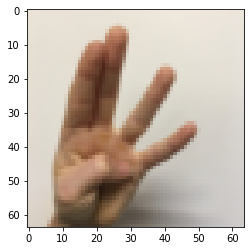

In [13]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [14]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


<a name='ex-2'></a>
### Exercise 2 - convolutional_model

Implement the `convolutional_model` function below to build the following model: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Use the functions above! 

Also, plug in the following parameters for all the steps:

 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 8 4 by 4 filters, stride 1, padding is "SAME"
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
 - **Conv2D**: Use 16 2 by 2 filters, stride 1, padding is "SAME"
 - **ReLU**
 - **MaxPool2D**: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 6 neurons and a softmax activation. 

In [25]:
# GRADED FUNCTION: convolutional_model


# Not sequential

#More complicated
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(filters=8,kernel_size=(4,4),padding='SAME')(input_img)  #The input data comes in a second set of brakets
    ## RELU
    A1 = tfl.ReLU()(Z1) # It is not Relu(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=(8,8),strides=(8,8),padding="SAME")(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(filters=16,kernel_size=(2,2),padding="SAME")(P1)
    ## RELU
    A2 = tfl.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=(4,4),strides=(4,4),padding="SAME")(A2)
    ## FLATTEN
    F = tfl.Flatten()(P2)
    ## Dense layer
    outputs=tfl.Dense(6,activation="softmax")(F)
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [26]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_10 (ReLU)              (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_11 (ReLU)              (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 16)         

Both the Sequential and Functional APIs return a TF Keras model object. The only difference is how inputs are handled inside the object model! 

<a name='4-4'></a>
### 4.4 - Train the Model

In [27]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 101ms/step - loss: 1.8214 - accuracy: 0.1722 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 2s 96ms/step - loss: 1.7925 - accuracy: 0.1889 - val_loss: 1.7870 - val_accuracy: 0.2333
Epoch 3/100
17/17 [==============================] - 2s 94ms/step - loss: 1.7877 - accuracy: 0.2093 - val_loss: 1.7826 - val_accuracy: 0.2167
Epoch 4/100
17/17 [==============================] - 2s 100ms/step - loss: 1.7836 - accuracy: 0.2426 - val_loss: 1.7783 - val_accuracy: 0.3583
Epoch 5/100
17/17 [==============================] - 2s 95ms/step - loss: 1.7781 - accuracy: 0.2880 - val_loss: 1.7735 - val_accuracy: 0.3417
Epoch 6/100
17/17 [==============================] - 2s 94ms/step - loss: 1.7714 - accuracy: 0.2972 - val_loss: 1.7664 - val_accuracy: 0.3583
Epoch 7/100
17/17 [==============================] - 2s 100ms/step - loss: 1.7631 - accuracy: 0.3185 - val_loss: 1.7585 - val_accuracy: 0.3833
Epo

<a name='5'></a>
## 5 - History Object 

The history object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that you can retrieve at `history.history`: 

In [28]:
history.history

{'loss': [1.8214211463928223,
  1.7924574613571167,
  1.7877423763275146,
  1.7835744619369507,
  1.7781294584274292,
  1.7714167833328247,
  1.7631334066390991,
  1.7535234689712524,
  1.7417405843734741,
  1.7279542684555054,
  1.7105661630630493,
  1.6899604797363281,
  1.665155291557312,
  1.6336331367492676,
  1.5993372201919556,
  1.5638598203659058,
  1.5272647142410278,
  1.4902853965759277,
  1.4527637958526611,
  1.4161055088043213,
  1.3806028366088867,
  1.3449690341949463,
  1.3089103698730469,
  1.2703611850738525,
  1.2342467308044434,
  1.2004570960998535,
  1.1677314043045044,
  1.1361702680587769,
  1.1070771217346191,
  1.0789995193481445,
  1.0515111684799194,
  1.0252140760421753,
  1.0006065368652344,
  0.9776651859283447,
  0.95585697889328,
  0.9351069927215576,
  0.915693461894989,
  0.8971505165100098,
  0.8792945742607117,
  0.8620133399963379,
  0.8448799252510071,
  0.8282189965248108,
  0.8123510479927063,
  0.7976651787757874,
  0.7843560576438904,
  0.77

Now visualize the loss over time using `history.history`: 

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

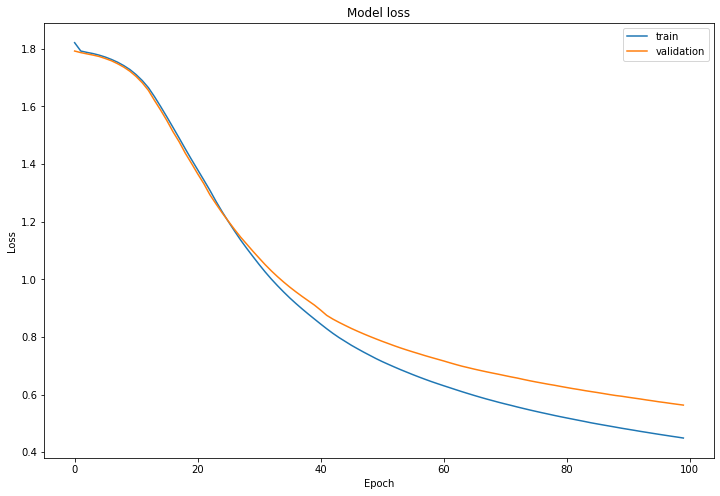

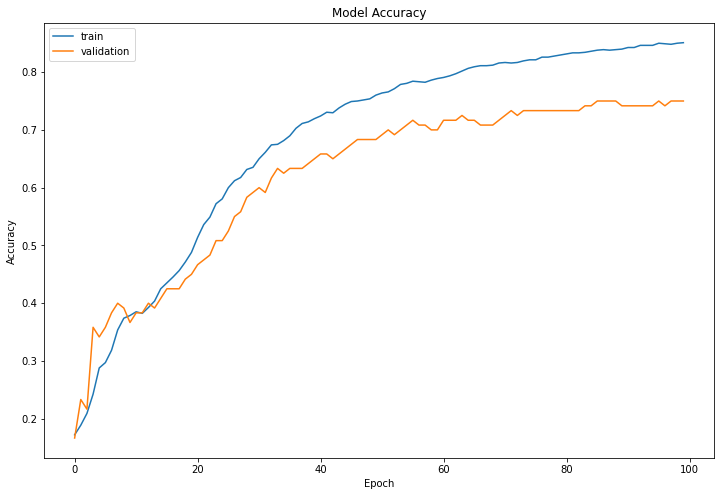

In [29]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

**Congratulations**! You've finished the assignment and built two models: One that recognizes  smiles, and another that recognizes SIGN language with almost 80% accuracy on the test set. In addition to that, you now also understand the applications of two Keras APIs: Sequential and Functional. Nicely done! 

By now, you know a bit about how the Functional API works and may have glimpsed the possibilities. In your next assignment, you'll really get a feel for its power when you get the opportunity to build a very deep ConvNet, using ResNets! 